In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
num_classes = 10
epochs = 15
num_predictions = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
history = model.fit(x_train, y_train,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)  

Epoch 1/15
1563/1563 [==============================] - 228s 146ms/step - loss: 1.8556 - accuracy: 0.3187 - val_loss: 1.5890 - val_accuracy: 0.4293
Epoch 2/15
1563/1563 [==============================] - 226s 145ms/step - loss: 1.5224 - accuracy: 0.4467 - val_loss: 1.3604 - val_accuracy: 0.5211
Epoch 3/15
1563/1563 [==============================] - 230s 147ms/step - loss: 1.3665 - accuracy: 0.5138 - val_loss: 1.3341 - val_accuracy: 0.5258
Epoch 4/15
1563/1563 [==============================] - 226s 145ms/step - loss: 1.2615 - accuracy: 0.5522 - val_loss: 1.1603 - val_accuracy: 0.5930
Epoch 5/15
1563/1563 [==============================] - 230s 147ms/step - loss: 1.1839 - accuracy: 0.5784 - val_loss: 1.1686 - val_accuracy: 0.5927
Epoch 6/15
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1139 - accuracy: 0.6085 - val_loss: 1.0202 - val_accuracy: 0.6431
Epoch 7/15
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0531 - accuracy: 0.6274 - val_

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy:', test_acc*100)

313/313 - 10s - loss: 0.7699 - accuracy: 0.7356
Test accuracy: 73.55999946594238


In [ ]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train accuracy:', train_acc*100)

1563/1563 - 51s - loss: 0.6757 - accuracy: 0.7652
Train accuracy: 76.51600241661072


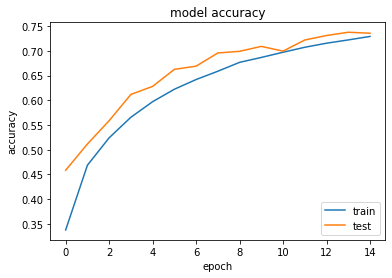

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

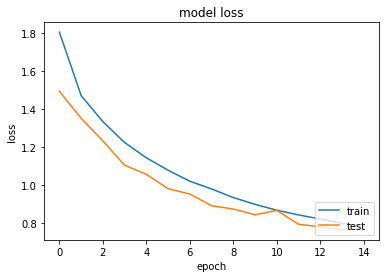

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
model.save("CNN_cifar.h5")